In [29]:
import numpy as np

# 1 experiments
N = 1
sample = np.random.randint(low=1, high=6+1, size=N)
print(sample)

[3]


In [37]:
# 100 experiments
N = 100
samples = np.random.randint(low=1, high=6+1, size=N)
print(samples)

print(set(samples))

[3 6 4 2 4 2 2 1 4 3 4 4 5 1 1 4 6 5 2 1 4 4 6 2 3 2 6 5 4 5 4 2 6 1 2 2 4
 5 4 2 3 4 2 1 4 3 2 4 1 4 5 4 3 1 3 4 1 1 3 2 4 6 1 3 1 5 4 4 4 6 2 3 3 3
 2 5 3 1 5 3 3 4 6 5 1 2 1 3 5 1 6 3 5 2 5 5 6 5 5 6]
{1, 2, 3, 4, 5, 6}


In [49]:
# 1000 experiments
N = 1000
samples = np.random.randint(low=1, high=6+1, size=N)

# Counting 
j=0
for i in samples:
    if i == 5: j+=1

print(f'Probability of a 5 is:{j/N}')

Probability of a 5 is:0.192


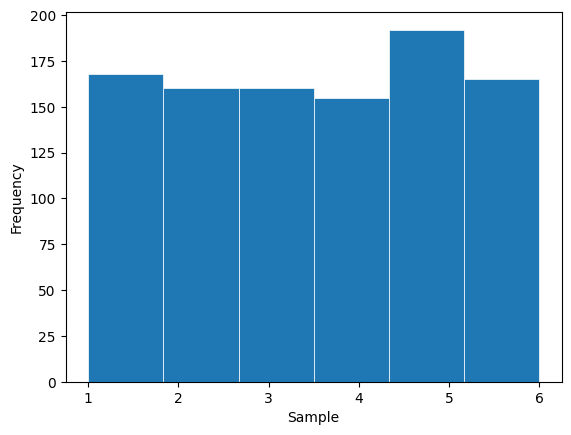

In [50]:
import matplotlib.pyplot as plt
# plot:
plt.hist(samples, bins=6, linewidth=0.5, edgecolor="white")
plt.xlim=(0,6)
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.show()

In [67]:
# Rolling a dice twice
# 1 experiment
N = 1
sample = np.random.randint(low=1, high=6+1, size=(N,2))
print(sample)

N = 1000
samples = np.random.randint(low=1, high=6+1, size=(N,2))
print(len(np.unique(samples,axis=0)))
# print(np.unique(samples,axis=0))

N = 100
samples = np.random.randint(low=1, high=6+1, size=(N,2))
print(len(np.unique(samples,axis=0)))

[[1 4]]
36
35


In [75]:
# Probability of a 5 in rolling twice
N = 100000
samples = np.random.randint(low=1, high=6+1, size=(N,2))

j = 0
for i in samples:
    if i[0] == 5 or i[1] == 5:
        j+=1
print(f'Probability is {j/N}')

Probability is 0.30436


In [76]:
# Probability of a sum of 7
N = 100000
samples = np.random.randint(low=1, high=6+1, size=(N,2))

j = 0
for i in samples:
    if i[0]+i[1] == 7:
        j+=1
print(f'Probability is {j/N}')

Probability is 0.1659


In [77]:
# Probability of different numbers
N = 100000
samples = np.random.randint(low=1, high=6+1, size=(N,2))

j = 0
for i in samples:
    if i[0] != i[1]:
        j+=1
print(f'Probability is {j/N}')

Probability is 0.83227


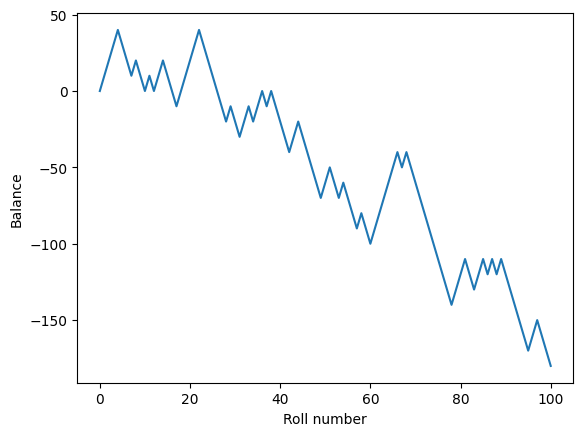

In [116]:
# Simulating a game
balance = 0
simulations = [0]
bet = 10
N = 100

for i in range(N):
    my_dice = np.random.randint(low=1, high=6+1)
    house = np.random.randint(low=1, high=6+1)
    
    if my_dice > house: balance += bet;
    else: balance -= bet;
    simulations.append(balance)

plt.plot(range(0,N+1),simulations)
plt.xlabel('Roll number')
plt.ylabel('Balance')
plt.show()

In [122]:
# Winning probability in each turn
N = 100000
j=0

for i in range(N):
    my_dice = np.random.randint(low=1, high=6+1)
    house = np.random.randint(low=1, high=6+1)
    if my_dice > house: j += 1;

print(f'Probability is {j/N}')

Probability is 0.4124


Mean value = 0.83
Standard deviation = 0.04
Coefficient of variation = 0.04


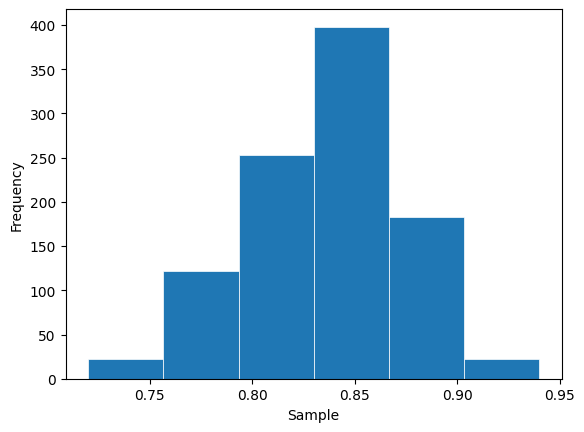

In [125]:
# Probability of different numbers
import numpy as np
NSamples = 100
NSimulations = 1000
P = []

for i in range(NSimulations):
    samples = np.random.randint(low=1, high=6+1, size=(NSamples,2))

    j = 0
    for k in samples:
        if k[0] != k[1]:
            j+=1
    P.append(j/NSamples)
print('Mean value = %.2f'%np.average(P))
print('Standard deviation = %.2f'%np.std(P))
print('Coefficient of variation = %.2f'%(np.std(P)/np.average(P)))

# plot:
import matplotlib.pyplot as plt
plt.hist(P, bins=6, linewidth=0.5, edgecolor="white")
plt.xlim=(0,6)
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.show()

In [84]:
from scipy.stats import qmc
sampler = qmc.Halton(d=2, scramble=False)
samples = sampler.random(n=5)
samples

array([[0.        , 0.        ],
       [0.5       , 0.33333333],
       [0.25      , 0.66666667],
       [0.75      , 0.11111111],
       [0.125     , 0.44444444]])

In [123]:
from scipy.stats import qmc
sampler = qmc.Halton(d=2)
samples = sampler.random(n=5)
l_bounds = [1,1]
u_bounds = [7,7]
samples=qmc.scale(samples, l_bounds, u_bounds)
print(samples)
print("\n",np.floor(samples))

[[5.45035038 2.85723419]
 [2.45035038 4.85723419]
 [6.95035038 6.85723419]
 [3.95035038 2.19056753]
 [4.70035038 4.19056753]]

 [[5. 2.]
 [2. 4.]
 [6. 6.]
 [3. 2.]
 [4. 4.]]


Mean value = 0.83
Standard deviation = 0.02
Coefficient of variation = 0.02


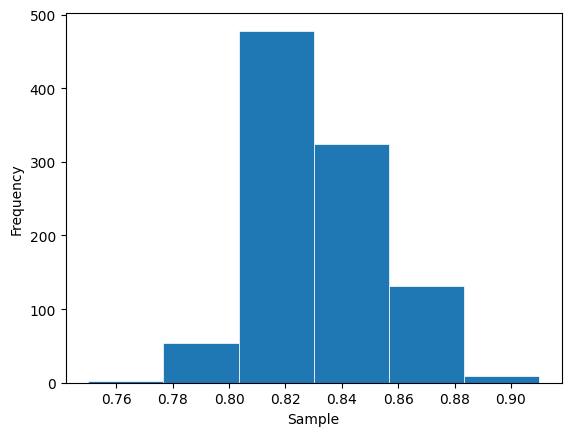

In [124]:
NSamples = 100
NSimulations = 1000
P = []

from scipy.stats import qmc
sampler = qmc.Halton(d=2, scramble=True)
_ = sampler.fast_forward(10000)
samples = sampler.random(NSamples)
l_bounds = [1,1]
u_bounds = [7,7]

for i in range(NSimulations):
    samples = sampler.random(NSamples)
    samples=np.floor(qmc.scale(samples, l_bounds, u_bounds))

    j = 0
    for k in samples:
        if k[0] != k[1]:
            j+=1
    P.append(j/NSamples)
print('Mean value = %.2f'%np.average(P))
print('Standard deviation = %.2f'%np.std(P))
print('Coefficient of variation = %.2f'%(np.std(P)/np.average(P)))

# plot:
import matplotlib.pyplot as plt
plt.hist(P, bins=6, linewidth=0.5, edgecolor="white")
plt.xlim=(0,6)
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.show()

In [91]:
NSamples = 10000

from scipy.stats import qmc
sampler = qmc.Halton(d=1, scramble=True)
_ = sampler.fast_forward(10000)
samples = sampler.random(NSamples)

f_ave=0
for i in samples:
    f_ave += np.exp(i)/NSamples
print(f_ave*(1-0))


[1.7182882]


In [121]:
f = lambda x:400*x**5-900*x**4+675*x**3-200*x**2+25*x+0.2

#---
NSamples = 10000
from scipy.stats import qmc
sampler = qmc.Halton(d=2, scramble=True)
_ = sampler.fast_forward(10000)
samples = sampler.random(NSamples)
samples=qmc.scale(samples, [0, 0], [0.8,4])

#---
j=0
for i in samples:
    if i[1]<f(i[0]): j+=1

print("I = %.3f"%(j/NSamples*0.8*4))


I = 1.639
